In [1]:
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import color, io
from IPython.display import Image


import torch.nn.functional as F

In [2]:
def show_feature_maps(filters):
    res = []
    for f in filters[0]:
        res.append(f.data.numpy())

    res = np.hstack(res)

    plt.imshow(res)

tamanho inicial: 
(512, 748, 3)


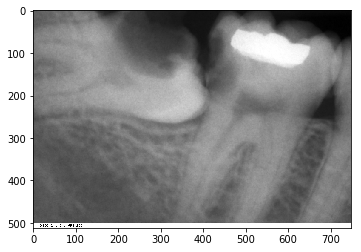

In [3]:
img = cv2.imread("./r.JPEG")

print("tamanho inicial: ")
print(img.shape)

plt.imshow(img)


tamanho depois da primeira convolução:
torch.Size([1, 2, 508, 744])


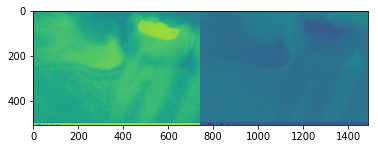

In [4]:
img = cv2.imread("./r.JPEG")
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = color.rgb2gray(img) # one channel - grayscale


# mudando o shape da imagem, Conv2d precisa que a imagem venha no formato
# batch x canais x altura x largura, mas a imagem com o formato altura x largura x canais 
img_tensor = torch.tensor([img], dtype=torch.float).permute(0,3,1,2)

# print(img.shape)
conv1_n_filters = 2
conv1 = torch.nn.Conv2d(3, conv1_n_filters, kernel_size=5)

# print(conv(img_tensor).shape)
# print(conv(img_tensor))

convs1 = conv1(img_tensor)
print("tamanho depois da primeira convolução:")
print(convs1.shape)
show_feature_maps(convs1)

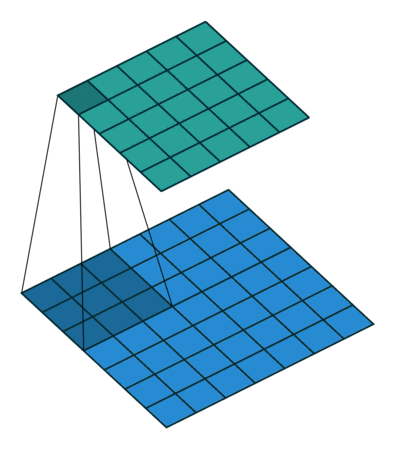

In [5]:
#Processo de convolução
Image(filename="./material/convolution.gif")

#parameters:
#     *stride
#     *kernel size
#     *padding

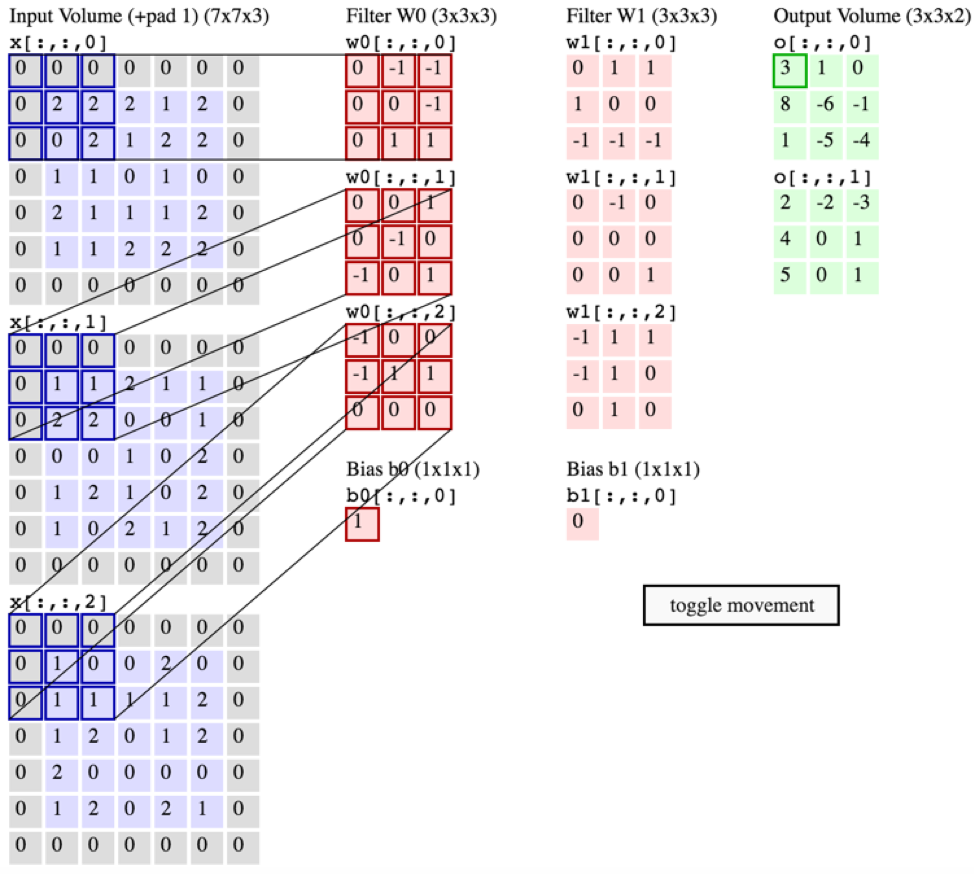

In [6]:
#Convolução com imagens de multiplos canais
Image(filename="./material/multi_channel_conv.png")

In [27]:
t = torch.nn.Conv2d(in_channels=3, out_channels=50, kernel_size=5)
#out_channels, in_channels, kernel_w, kernel_h
t.weight.shape

torch.Size([50, 3, 5, 5])

tamanho depois do pooling:
torch.Size([1, 2, 254, 372])


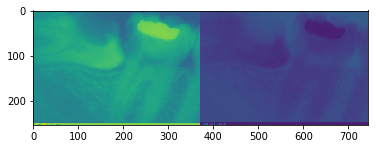

In [7]:
conv_pull1 = F.max_pool2d(convs1, 2)
print("tamanho depois do pooling:")
print(conv_pull1.shape)
# print(conv_pull)
show_feature_maps(conv_pull1)

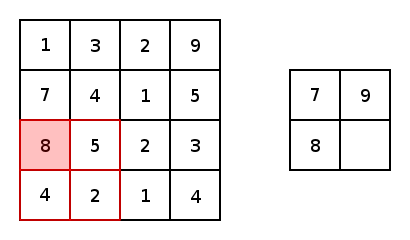

In [8]:
#Processo de max pooling
Image(filename="./material/max_pooling.gif")

# kernel_size = 2
# Stride = 2

torch.Size([1, 2, 254, 372])


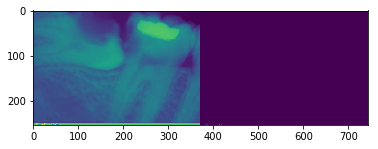

In [9]:
relu1 = F.relu(conv_pull1)# activation
# print(relu)
print(relu1.shape)
show_feature_maps(relu1)

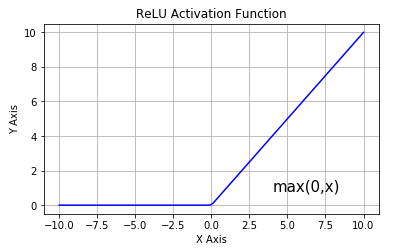

In [10]:
#Função de ativação ReLU
Image(filename="./material/relu_graph.png")

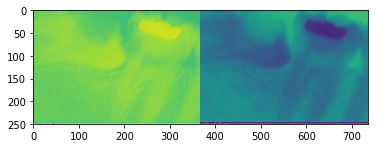

In [11]:
conv2_f = torch.nn.Conv2d(conv1_n_filters, 2, kernel_size=5)

# for param in conv2_f.parameters():
#     print(param)

convs2 = conv2_f(relu1)

show_feature_maps(convs2)

torch.Size([1, 2, 125, 184])


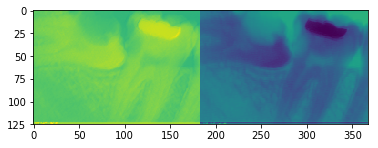

In [12]:
conv_pull2 = F.max_pool2d(convs2, 2)
print(conv_pull2.shape)
# print(conv_pull)
show_feature_maps(conv_pull2)

torch.Size([1, 2, 125, 184])


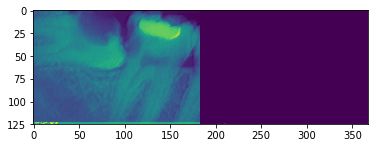

In [13]:
relu2 = F.relu(conv_pull2)# activation
# print(relu)
print(relu2.shape)
show_feature_maps(relu2)

In [14]:
flatten_n = np.prod(relu2.shape)
flatten = relu2.view(-1, flatten_n)

# jogar flatten na rede neural->

print(flatten_n)

46000
